# Analysis of Fitting

In [5]:
import tellurium as te
from SBstoat.modelFitter import ModelFitter
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

In [2]:
import SBstoat
SBstoat.__version__

'1.13'

In [3]:
model = te.loada('''

function HillTime(V, K, n, t)
    ((V * n * (K^n) * (t^(n-1))) / (((K^n) + (t^n))^2))
end

model modular_EGFR_current_128()

// Reactions

SproutyFunc: -> Spry2; HillTime(V_0, K_0, n_0, t)


// Species IVs
Spry2 = 0;

// Parameter values
V_0 = 19.9059673;
K_0 = 10153.3568;
n_0 = 2.52290790;
t := time

end
''')

# sim = model.simulate(0, 7200, 7201)
# model.plot()
# quit()



fitter = ModelFitter(model, "spry2_2a.txt", ["V_0", "K_0", "n_0"],
                     fitterMethods='differential_evolution', parameterDct={
            "V_0": (10, 20, 40), "K_0": (1800, 6000, 20000), "n_0": (1, 2, 12)})
fitter.fitModel()
print(fitter.reportFit())

[[Variables]]
    V_0:  10.017436467010777
    K_0:  5999.656259493818
    n_0:  1.6855341212932522
[[Fit Statistics]]
    # fitting method   = differential_evolution
    # function evals   = 101
    # data points      = 4
    # variables        = 3
    chi-square         = 91.6697346
    reduced chi-square = 91.6697346
    Akaike info crit   = 18.5275917
    Bayesian info crit = 16.6864747
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.


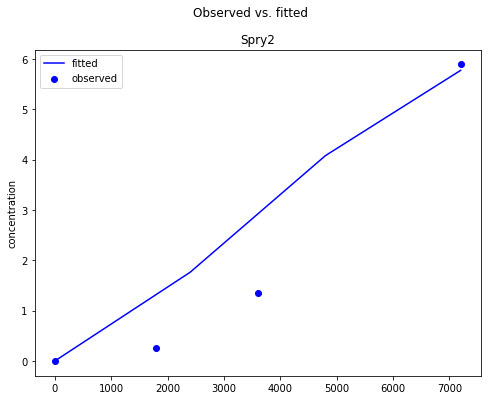

In [6]:
fitter.plotFitAll()